# Import Libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)

import warnings
warnings.filterwarnings('ignore')

In [25]:
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [26]:
import seaborn as sns
sns.set_theme(style="ticks")

# Dataset exploration


In [27]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep = ';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


## Let's look at the dataset size, feature names and their types


In [8]:
print(df.shape)
df.tail(5)


(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.10,94.77,-50.80,1.03,4963.60,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.10,94.77,-50.80,1.03,4963.60,no


## Attributing information


In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype='object')

In [ ]:
#  age - client's age in years (numeric)
#  job - type of job (categorical: admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown)
#  marital - marital status (categorical: divorced, married, single, unknown)
#  education - client's education (categorical: basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown)
#  default - has credit in default? (categorical: no, yes, unknown)
#  housing - has housing loan? (categorical: no, yes, unknown)
#  loan - has personal loan? (categorical: no, yes, unknown)
#  contact - contact communication type (categorical: cellular, telephone)
#  month - last contact month of the year (categorical: jan, feb, mar, ..., nov, dec)
#  day_of_week - last contact day of the week (categorical: mon, tue, wed, thu, fri)
#  duration - last contact duration, in seconds (numeric).
#  campaign - number of contacts performed and for this client during this campaign (numeric, includes the last contact)
#  pdays - number of days that have passed after the client was last contacted from the previous campaign 
#  previous - number of contacts performed for this client before this campaign (numeric)
#  poutcome - outcome of the previous marketing campaign (categorical: failure, nonexistent, success)
#  emp.var.rate - employment variation rate, quarterly indicator (numeric)
#  cons.price.idx - consumer price index, monthly indicator (numeric)
#  cons.conf.idx - consumer confidence index, monthly indicator (numeric)
#  euribor3m - euribor 3 month rate, daily indicator (numeric)
#  nr.employed - number of employees, quarterly indicator (numeric)

### Output feature (desired target):

y - has the client subscribed a term deposit? (binary: yes,no)

In [10]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# As we can see, the dataset is full, no pass (non-null), so there is no need to fill the gaps. The dataset contains 5 integer (int64)
# , 5 real (float64) and 11 categorical and binary (object) features.

# Method describe shows the main statistical characteristics of the dataset for each numerical feature 
# (int64 and float64 types): the existing values number, mean, standard deviation, range, min & max, 0.25, 0.5 and 0.75 quartiles.

In [11]:
df.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


In [ ]:
# To see the statistics on non-numeric features, we need to explicitly specify the feature types by the include parameter.
# We can also set include = all to output statistics on all the existing features.

In [12]:
df.describe(include = ["object"])


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [ ]:
# use the value_counts method. Let's look at the target feature (y) distribution:

In [15]:
df["y"].value_counts(normalize=True)

no    0.89
yes   0.11
Name: y, dtype: float64

In [ ]:
# let's look at the client distribution by the variable marital

In [16]:
df["marital"].value_counts(normalize = True)


married    0.61
single     0.28
divorced   0.11
unknown    0.00
Name: marital, dtype: float64

## Sorting

In [17]:
df.sort_values(by = "duration", ascending = False).head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24091,33,technician,single,professional.course,no,yes,no,telephone,nov,mon,4918,1,999,0,nonexistent,-0.10,93.20,-42.00,4.41,5195.80,no
22192,52,blue-collar,married,basic.4y,no,no,no,telephone,aug,thu,4199,3,999,0,nonexistent,1.40,93.44,-36.10,4.96,5228.10,yes
40537,27,admin.,single,high.school,no,no,no,telephone,aug,fri,3785,1,999,0,nonexistent,-1.70,94.03,-38.30,0.89,4991.60,no
13820,31,technician,married,professional.course,no,no,no,cellular,jul,thu,3643,1,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,yes
7727,37,unemployed,married,professional.course,no,yes,no,telephone,may,fri,3631,2,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,yes


In [ ]:
#The sorting results show that the longest calls exceed one hour, as the value duration is more than 3600 seconds or 1 hour

In [20]:
df.sort_values(by = ["age", "duration"], ascending = [True, False]).head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38274,17,student,single,unknown,no,no,yes,cellular,oct,tue,896,1,2,2,success,-3.40,92.43,-26.90,0.74,5017.50,yes
37579,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,498,2,999,1,failure,-2.90,92.20,-31.40,0.87,5076.20,yes
37140,17,student,single,unknown,no,yes,no,cellular,aug,wed,432,3,4,2,success,-2.90,92.20,-31.40,0.88,5076.20,no
37539,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,182,2,999,2,failure,-2.90,92.20,-31.40,0.87,5076.20,no
37558,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,92,3,4,2,success,-2.90,92.20,-31.40,0.87,5076.20,no
37125,18,student,single,basic.9y,no,yes,no,cellular,aug,tue,642,1,999,0,nonexistent,-2.90,92.20,-31.40,0.88,5076.20,yes
37626,18,student,single,basic.6y,no,yes,no,cellular,aug,mon,628,1,999,0,nonexistent,-2.90,92.20,-31.40,0.86,5076.20,no
41084,18,student,single,unknown,no,yes,no,cellular,nov,tue,600,2,999,3,failure,-1.10,94.77,-50.80,1.05,4963.60,no
37955,18,student,single,unknown,no,yes,no,cellular,sep,fri,563,1,999,0,nonexistent,-3.40,92.38,-29.80,0.80,5017.50,yes
40379,18,student,single,unknown,no,yes,no,cellular,aug,wed,561,1,17,2,failure,-1.70,94.03,-38.30,0.90,4991.60,yes


In [ ]:
# We see that the youngest customers are at the age of 17, and the call duration exceeded 3 minutes only for three clients, 
# which indicates the ineffectiveness of long-term interaction with such clients.

## Apply the function to each column:



In [28]:
df.apply(np.max)

age                      98
job                 unknown
marital             unknown
education           unknown
default                 yes
housing                 yes
loan                    yes
contact           telephone
month                   sep
day_of_week             wed
duration               4918
campaign                 56
pdays                   999
previous                  7
poutcome            success
emp.var.rate           1.40
cons.price.idx        94.77
cons.conf.idx        -26.90
euribor3m              5.04
nr.employed         5228.10
y                       yes
dtype: object

### he map can also be used for the values ​​replacement in a column 

In [29]:
d = {"no": 0, "yes": 1}
df["y"] = df["y"].map(d)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0


## Indexing and extracting data


### We can use the code dataframe ['name'] to extract a separate column. 

In [30]:
print(f'Share of attracted clients = { df["y"].mean() }')


Share of attracted clients = 0.11265417111780131


In [32]:
print("Share of attracted clients =", '{:.2e}'.format ( df["y"].mean() ) )

Share of attracted clients = 1.13e-01


In [ ]:
#11,3% is a rather bad indicator for a bank, with such a percentage of attracted customers a business can collaps

In [ ]:
# https://mkaz.blog/code/python-string-format-cookbook/

### What are the mean values ​​of numerical features among the attracted clients?

In [33]:
df [ df["y"] == 1 ].mean() 


age                40.91
duration          553.19
campaign            2.05
pdays             792.04
previous            0.49
emp.var.rate       -1.23
cons.price.idx     93.35
cons.conf.idx     -39.79
euribor3m           2.12
nr.employed      5095.12
y                   1.00
dtype: float64

### What is the average call duration for the attracted clients?

In [34]:
acd = round(df[ df["y"] == 1 ]["duration"].mean(), 2)
acd_in_min = acd // 60
print("Average call duration for attracted clients =", acd_in_min, "min", int(acd) % 60, "sec")

Average call duration for attracted clients = 9.0 min 13 sec


### What is the average age of attracted (y == 1) and unmarried ('marital' == 'single') clients?



In [35]:
print("Average age of attracted clients =", int( df[(df["y"] == 1) & (df["marital"] == "single")]["age"].mean()), "years")


Average age of attracted clients = 31 years


# Pivot tables


## Crosstab
Suppose we want to see how observations in our sample are distributed in the context of two features - y and marital

In [37]:
pd.crosstab(df["y"], df["marital"],normalize=True)

marital,divorced,married,single,unknown
y,,,,
0,0.10,0.54,0.24,0.00
1,0.01,0.06,0.04,0.00


In [ ]:
# find more about cross tab in https://datagy.io/pandas-crosstab/

In [ ]:
pd.crosstab(df["y"],
            df["marital"],
            normalize =True)

### Let's find the average age and the call duration for different types of client employment job:

In [45]:
df.pivot_table(
    values=["age", "duration"], index=["education"],
    aggfunc = np.max).sort_values(by='age',ascending=False)

,age,duration
education,,
basic.4y,98,4199
basic.6y,95,3078
basic.9y,94,3509
unknown,92,2062
university.degree,91,3076
high.school,88,3785
professional.course,86,4918
illiterate,80,1196


In [46]:
df.pivot_table(
    ["age", "duration"], index=["job"],
    aggfunc={'age': np.mean,'duration':np.max}
).sort_values(by='duration',ascending=False)

,age,duration
job,,
technician,38.51,4918
blue-collar,39.56,4199
admin.,38.19,3785
unemployed,39.73,3631
management,42.36,3422
self-employed,39.95,3366
retired,62.03,3183
housemaid,45.50,2926
student,25.89,2680


In [ ]:
# for more infor on pandas pivot table see : https://pbpython.com/pandas-pivot-table-explained.html

# Plotting

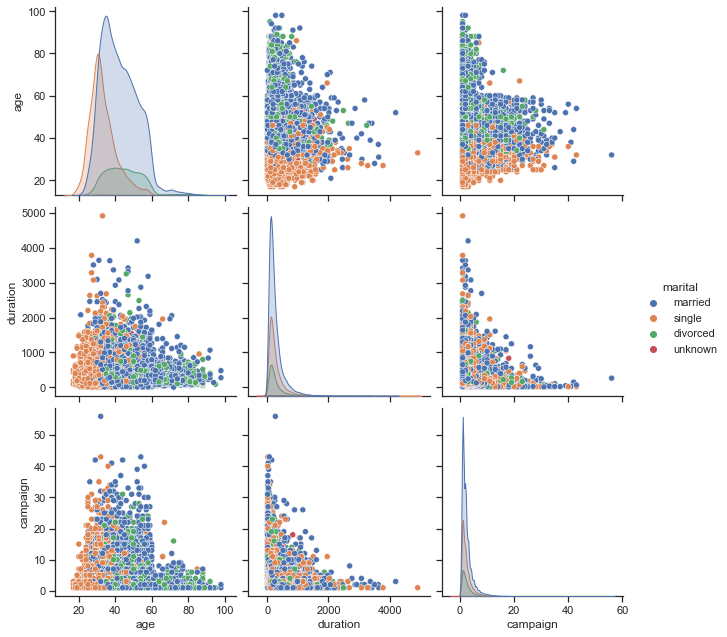

In [48]:
sns.pairplot(data=df,vars=["age", "duration", "campaign"],hue='marital',height=3)

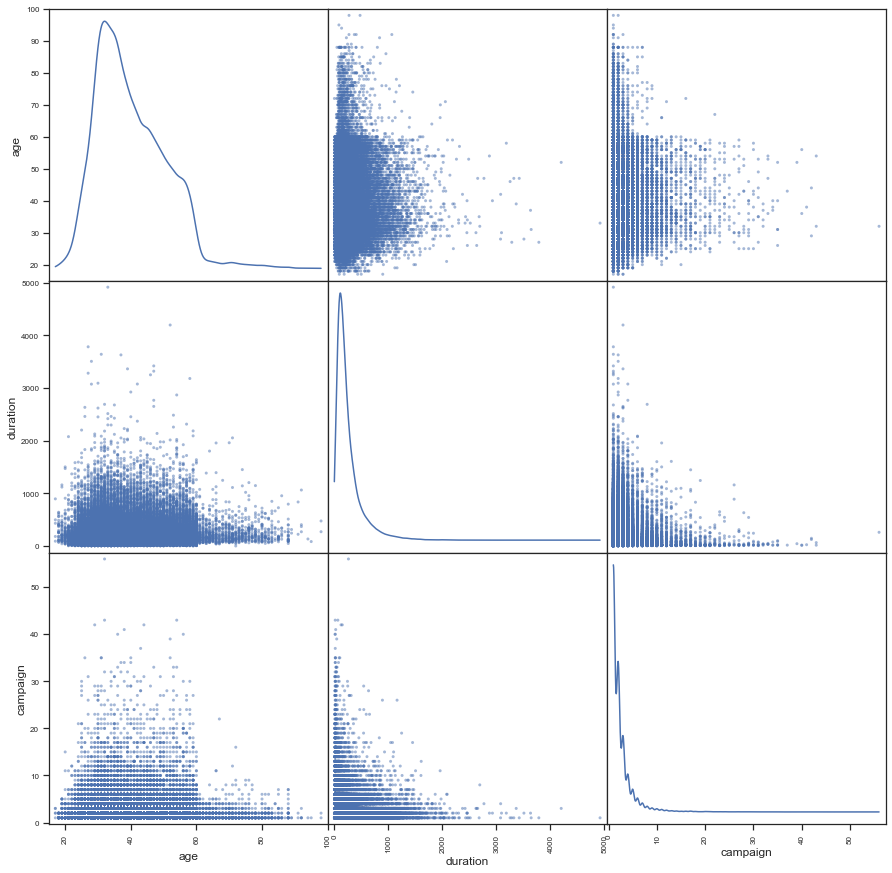

In [49]:
pd.plotting.scatter_matrix(
    df[["age", "duration", "campaign"]],
    figsize = (15, 15),
    diagonal = "kde")
plt.show()

## histogram for age feature:## 

<AxesSubplot:xlabel='age', ylabel='Count'>

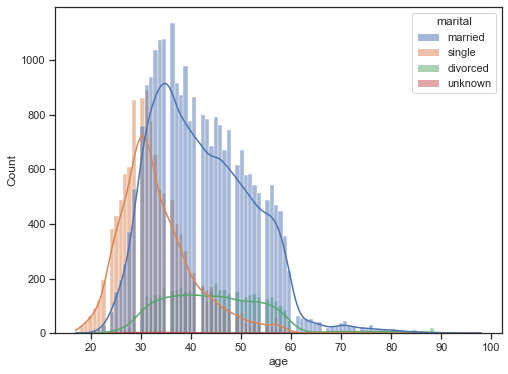

In [51]:
sns.histplot(data=df,kde=True,x='age',hue='marital')

<AxesSubplot:>

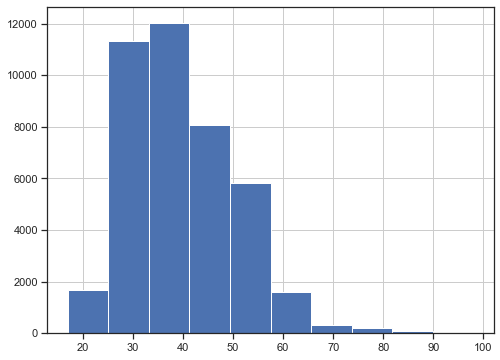

In [52]:
df["age"].hist()

## Now we will build histogram for features all together:



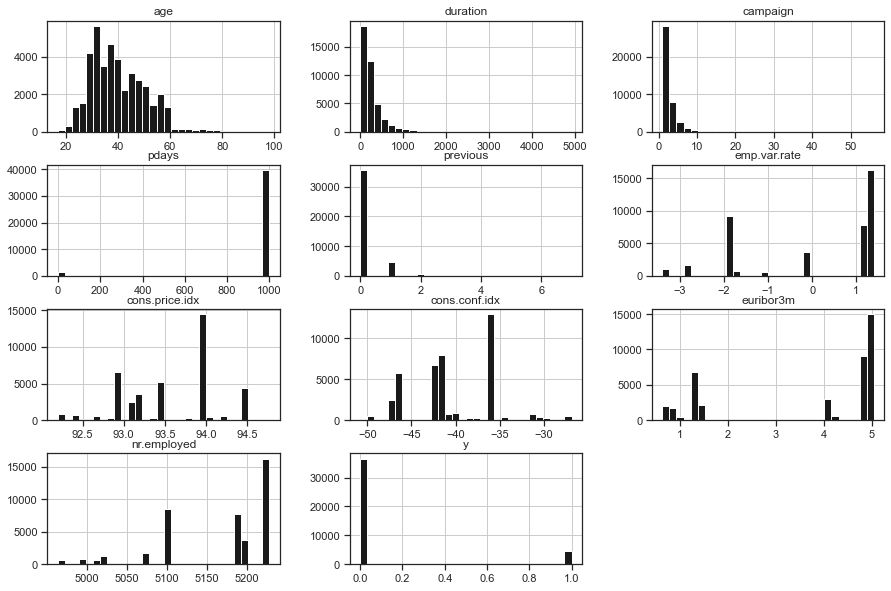

In [53]:
df.hist(color = "k",
        bins = 30,
        figsize = (15, 10))
plt.show()

<AxesSubplot:xlabel='marital', ylabel='Count'>

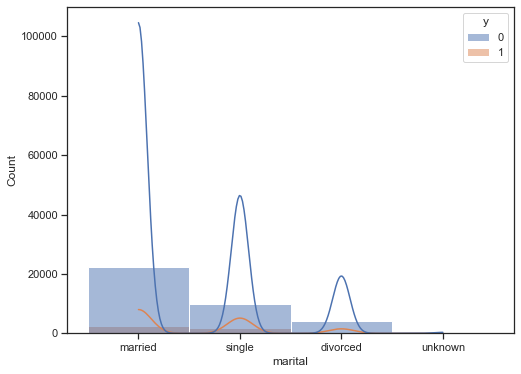

In [54]:
sns.histplot(data=df,kde=True,x='marital',hue='y')

### boxplot
Now we will use Box Plot. It will allow us to compactly visualize the main characteristics of the feature distribution (the median, lower and upper quartile, minimal and maximum, outliers).

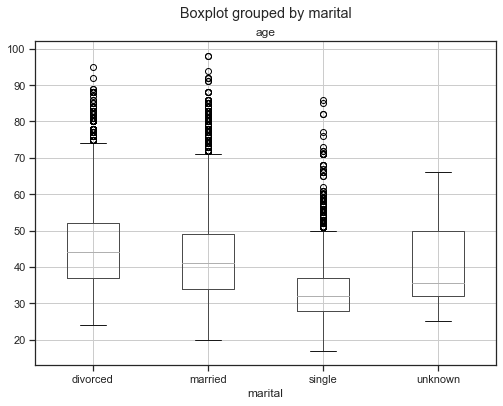

In [55]:
df.boxplot(column = "age",
           by = "marital")
plt.show()

<AxesSubplot:xlabel='marital', ylabel='age'>

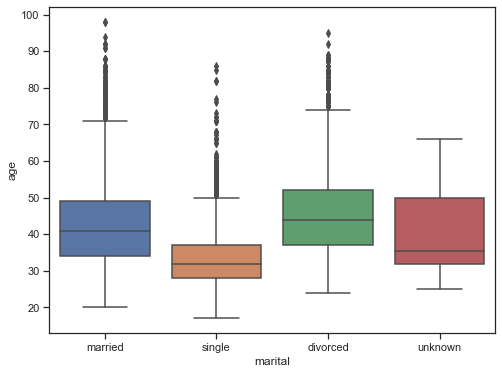

In [56]:
sns.boxplot(data=df,x='marital',y='age',)

# Questions

## quetion 1
List of 10 clients with the largest number of contacts.



## question 2
Determine the median age and the number of contacts for different levels of client education.



## question 3
Output box plot to analyze the client age distribution by their education level.

